<a href="https://colab.research.google.com/github/thamonS/python_dataviz2024/blob/main/Project/Movie_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Data_viz/Project_Dash')

In [ ]:
df_Netflix = pd.read_csv("NETFLIX.csv")
df_Netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Preparing Data

## ตารางหลัก

In [ ]:
df_Netflix.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
# เปลี่ยนค่าว่างในแต่ละคอลัมน์
df_Netflix['director'].fillna('Unknown', inplace=True)
df_Netflix['cast'].fillna('Unknown', inplace=True)
df_Netflix['country'].fillna('Unknown', inplace=True)
df_Netflix['date_added'].fillna('Unknown', inplace=True)


<ipython-input-44-68e79a8ae7a3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Netflix['director'].fillna('Unknown', inplace=True)
<ipython-input-44-68e79a8ae7a3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
df_Netflix['year_added'] = df_Netflix['date_added'].str[-4:]

In [ ]:
df_Netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020


In [ ]:
# หาจำนวนประเภทสูงสุดที่มีในแต่ละแถว
max_genres = df_Netflix['listed_in'].apply(lambda x: len(x.split(','))).max()

# สร้างคอลัมน์ Genre1, Genre2, ... ตามจำนวนประเภทสูงสุดที่พบ
for i in range(max_genres):
    df_Netflix[f'Genre{i+1}'] = None

# แยกประเภทใน listed_in และใส่ค่าลงในคอลัมน์ที่สร้างไว้
for index, row in df_Netflix.iterrows():
    genres = row['listed_in'].split(',')
    genres = [genre.strip() for genre in genres]
    for i, genre in enumerate(genres):
        df_Netflix.at[index, f'Genre{i+1}'] = genre

# ดูผลลัพธ์
df_Netflix


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,Genre1,Genre2,Genre3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,Documentaries,None,None
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,International TV Shows,TV Dramas,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,Crime TV Shows,International TV Shows,TV Action & Adventure
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,Docuseries,Reality TV,None
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,Cult Movies,Dramas,Thrillers
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,Kids' TV,Korean TV Shows,TV Comedies
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,Comedies,Horror Movies,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,Children & Family Movies,Comedies,None


In [ ]:
df_TV = df_Netflix[df_Netflix['type'] == 'TV Show']
df_TV

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,Genre1,Genre2,Genre3
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,International TV Shows,TV Dramas,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,Crime TV Shows,International TV Shows,TV Action & Adventure
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,Docuseries,Reality TV,None
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,International TV Shows,Romantic TV Shows,TV Comedies
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,TV Dramas,TV Horror,TV Mysteries
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,Unknown,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2018,Anime Series,Kids' TV,None
8796,s8797,TV Show,Yunus Emre,Unknown,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2017,International TV Shows,TV Dramas,None
8797,s8798,TV Show,Zak Storm,Unknown,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018,Kids' TV,None,None
8800,s8801,TV Show,Zindagi Gulzar Hai,Unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016,International TV Shows,Romantic TV Shows,TV Dramas


In [ ]:
df_TV['Genre1'].value_counts()

,count
Genre1,
International TV Shows,774
Crime TV Shows,399
Kids' TV,388
British TV Shows,253
Docuseries,221
Anime Series,176
TV Comedies,120
Reality TV,120
TV Dramas,67


In [ ]:
df_Movie = df_Netflix[df_Netflix['type'] == 'Movie']
df_Movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,Genre1,Genre2,Genre3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,Documentaries,None,None
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,Children & Family Movies,None,None
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,Dramas,Independent Movies,International Movies
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,Comedies,Dramas,None
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,Dramas,International Movies,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016,Dramas,International Movies,Thrillers
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,Cult Movies,Dramas,Thrillers
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,Comedies,Horror Movies,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,Children & Family Movies,Comedies,None


In [ ]:
df_rating = df_Netflix[df_Netflix['rating'].isin(['74 min', '84 min', '66 min'])]
df_rating


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,Genre1,Genre2,Genre3
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017,Movies,None,None
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016,Movies,None,None
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016,Movies,None,None


In [ ]:
# Assuming you want to change the duration for show_id 's5542' to '74 min'

# Find the row where show_id is 's5542'
row_to_update = df_Netflix[df_Netflix['show_id'] == 's5542']

# If the row exists, update the duration
if not row_to_update.empty:
  df_Netflix.loc[df_Netflix['show_id'] == 's5542', 'duration'] = '74 min'

# Print the updated DataFrame to verify the change
df_Netflix[df_Netflix['show_id'] == 's5542']


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,Genre1,Genre2,Genre3
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017,Movies,None,None


In [ ]:
# Find the row where show_id is 's5542'
row_to_update = df_Netflix[df_Netflix['show_id'] == 's5795']

# If the row exists, update the duration
if not row_to_update.empty:
  df_Netflix.loc[df_Netflix['show_id'] == 's5795', 'duration'] = '84 min'

# Print the updated DataFrame to verify the change
df_Netflix[df_Netflix['show_id'] == 's5795']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,Genre1,Genre2,Genre3
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016,Movies,None,None


In [ ]:
# Find the row where show_id is 's5542'
row_to_update = df_Netflix[df_Netflix['show_id'] == 's5814']

# If the row exists, update the duration
if not row_to_update.empty:
  df_Netflix.loc[df_Netflix['show_id'] == 's5814', 'duration'] = '66 min'

# Print the updated DataFrame to verify the change
df_Netflix[df_Netflix['show_id'] == 's5814']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,Genre1,Genre2,Genre3
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...,2016,Movies,None,None


In [ ]:
df_Netflix = df_Netflix[~df_Netflix['rating'].str.contains('min', na=False)]


In [ ]:
# แทนที่ค่าว่างในคอลัมน์ rating ด้วยค่า mode
mode_rating = df_Netflix['rating'].mode()[0]
df_Netflix['rating'].fillna(mode_rating, inplace=True)


<ipython-input-56-5f10cef3f2f2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Netflix['rating'].fillna(mode_rating, inplace=True)
<ipython-input-56-5f10cef3f2f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Netflix['rating'].fillna(mode_rating, inplace=True)


In [ ]:
# แทนที่ค่าว่างในคอลัมน์ Genre2 และ Genre3 ด้วย "Unknown"
df_Netflix['Genre2'].fillna('Unknown', inplace=True)
df_Netflix['Genre3'].fillna('Unknown', inplace=True)


<ipython-input-57-be0d0ba64730>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Netflix['Genre2'].fillna('Unknown', inplace=True)
<ipython-input-57-be0d0ba64730>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Netflix['Genre2'].fillna('Unknown', inplace=True)
<ipython-input-57-be0d0ba64730>:3: FutureWarning: A value is trying to be set

In [ ]:
df_Netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,Genre1,Genre2,Genre3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,Documentaries,Unknown,Unknown
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,International TV Shows,TV Dramas,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,Crime TV Shows,International TV Shows,TV Action & Adventure
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,Docuseries,Reality TV,Unknown
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,Cult Movies,Dramas,Thrillers
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,Kids' TV,Korean TV Shows,TV Comedies
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,Comedies,Horror Movies,Unknown
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,Children & Family Movies,Comedies,Unknown


In [ ]:
# สร้างคอลัมน์ Cast1 และ Cast2 ใหม่โดยตรง
df_Netflix['Cast1'] = df_Netflix['cast'].apply(lambda x: x.split(',')[0].strip() if len(x.split(',')) > 0 else None)
df_Netflix['Cast2'] = df_Netflix['cast'].apply(lambda x: x.split(',')[1].strip() if len(x.split(',')) > 1 else None)

# ดูผลลัพธ์
df_Netflix.head()

<ipython-input-59-cfc3aa93398b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Netflix['Cast1'] = df_Netflix['cast'].apply(lambda x: x.split(',')[0].strip() if len(x.split(',')) > 0 else None)
<ipython-input-59-cfc3aa93398b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Netflix['Cast2'] = df_Netflix['cast'].apply(lambda x: x.split(',')[1].strip() if len(x.split(',')) > 1 else None)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,Genre1,Genre2,Genre3,Cast1,Cast2
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,Documentaries,Unknown,Unknown,Unknown,None
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,International TV Shows,TV Dramas,TV Mysteries,Ama Qamata,Khosi Ngema
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,Crime TV Shows,International TV Shows,TV Action & Adventure,Sami Bouajila,Tracy Gotoas
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,Docuseries,Reality TV,Unknown,Unknown,None
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,International TV Shows,Romantic TV Shows,TV Comedies,Mayur More,Jitendra Kumar


In [ ]:
# แทนที่ค่าว่างในคอลัมน์ Cast1 และ Cast2 ด้วย "Unknown"
df_Netflix['Cast1'].fillna('Unknown', inplace=True)
df_Netflix['Cast2'].fillna('Unknown', inplace=True)


<ipython-input-60-1b18e96e13e0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Netflix['Cast1'].fillna('Unknown', inplace=True)
<ipython-input-60-1b18e96e13e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Netflix['Cast1'].fillna('Unknown', inplace=True)
<ipython-input-60-1b18e96e13e0>:3: FutureWarning: A value is trying to be set o

In [ ]:
df_Netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,Genre1,Genre2,Genre3,Cast1,Cast2
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,Documentaries,Unknown,Unknown,Unknown,Unknown
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,International TV Shows,TV Dramas,TV Mysteries,Ama Qamata,Khosi Ngema
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,Crime TV Shows,International TV Shows,TV Action & Adventure,Sami Bouajila,Tracy Gotoas
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,Docuseries,Reality TV,Unknown,Unknown,Unknown
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,International TV Shows,Romantic TV Shows,TV Comedies,Mayur More,Jitendra Kumar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,Cult Movies,Dramas,Thrillers,Mark Ruffalo,Jake Gyllenhaal
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,Kids' TV,Korean TV Shows,TV Comedies,Unknown,Unknown
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,Comedies,Horror Movies,Unknown,Jesse Eisenberg,Woody Harrelson
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,Children & Family Movies,Comedies,Unknown,Tim Allen,Courteney Cox


In [ ]:
import pandas as pd

# สร้างฟังก์ชันสำหรับการแปลงวันที่
def safe_to_datetime(value):
    try:
        return pd.to_datetime(value)
    except ValueError:
        return value  # คืนค่าดั้งเดิมถ้าเกิดข้อผิดพลาด

# ใช้ฟังก์ชันในการแปลงและสร้างคอลัมน์ใหม่
df_Netflix['date_added'] = df_Netflix['date_added'].apply(safe_to_datetime)

# ดูผลลัพธ์
df_Netflix.head()

<ipython-input-62-e2970534a5c1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Netflix['date_added'] = df_Netflix['date_added'].apply(safe_to_datetime)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,Genre1,Genre2,Genre3,Cast1,Cast2
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,Documentaries,Unknown,Unknown,Unknown,Unknown
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,International TV Shows,TV Dramas,TV Mysteries,Ama Qamata,Khosi Ngema
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,Crime TV Shows,International TV Shows,TV Action & Adventure,Sami Bouajila,Tracy Gotoas
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,Docuseries,Reality TV,Unknown,Unknown,Unknown
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,International TV Shows,Romantic TV Shows,TV Comedies,Mayur More,Jitendra Kumar


In [ ]:
# สร้างคอลัมน์ใหม่ month_added โดยแยกเดือนจาก date_added
df_Netflix['month_added'] = df_Netflix['date_added'].apply(lambda x: x.strftime('%B') if isinstance(x, pd.Timestamp) else x)

# ดูผลลัพธ์
df_Netflix[['date_added', 'month_added']].head()

<ipython-input-63-63f8a658f3f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Netflix['month_added'] = df_Netflix['date_added'].apply(lambda x: x.strftime('%B') if isinstance(x, pd.Timestamp) else x)


,date_added,month_added
0,2021-09-25 00:00:00,September
1,2021-09-24 00:00:00,September
2,2021-09-24 00:00:00,September
3,2021-09-24 00:00:00,September
4,2021-09-24 00:00:00,September


In [ ]:
df_Netflix['duration'] = df_Netflix['duration'].str.replace(' min', '').str.strip()
df_Netflix

<ipython-input-64-3779be1cb694>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Netflix['duration'] = df_Netflix['duration'].str.replace(' min', '').str.strip()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,Genre1,Genre2,Genre3,Cast1,Cast2,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25 00:00:00,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021,Documentaries,Unknown,Unknown,Unknown,Unknown,September
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,International TV Shows,TV Dramas,TV Mysteries,Ama Qamata,Khosi Ngema,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,Crime TV Shows,International TV Shows,TV Action & Adventure,Sami Bouajila,Tracy Gotoas,September
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,Docuseries,Reality TV,Unknown,Unknown,Unknown,September
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,International TV Shows,Romantic TV Shows,TV Comedies,Mayur More,Jitendra Kumar,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20 00:00:00,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,Cult Movies,Dramas,Thrillers,Mark Ruffalo,Jake Gyllenhaal,November
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01 00:00:00,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,Kids' TV,Korean TV Shows,TV Comedies,Unknown,Unknown,July
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01 00:00:00,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,Comedies,Horror Movies,Unknown,Jesse Eisenberg,Woody Harrelson,November
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11 00:00:00,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,Children & Family Movies,Comedies,Unknown,Tim Allen,Courteney Cox,January


### สร้างคอลัมน์ continent (movie produce)

In [ ]:
continent_mapping = {
    "North America": [
        "Canada", "US", "Mexico", "Guatemala", "Belize", "El Salvador", "Honduras",
        "Costa Rica", "Nicaragua", "Panama", "Bermuda", "Bahamas", "Haiti",
        "Cuba", "Jamaica", "Dominican Republic", "Dominica",
        "St.Kitts and Nevis", "St. Lucia", "St. Vincent and The Grenadines",
        "Barbados", "Grenada", "Trinidad and Tobago","United States"
    ],
    "South America": [
        "Colombia", "Venezuela", "Guyana", "Suriname", "Brazil", "Ecuador",
        "Peru", "Bolivia", "Paraguay", "Chile", "Argentina", "Uruguay"
    ],
    "Europe": [
        "Iceland", "Norway", "Sweden", "Finland", "Russia", "Estonia", "Latvia",
        "Lithuania", "Belarus", "Ireland", "UK", "Denmark", "Portugal", "Spain",
        "Andorra", "France", "Monaco", "Switzerland", "Liechtenstein",
        "Luxembourg", "Belgium", "Netherlands", "Germany", "Italy", "Malta",
        "San Marino", "Poland", "Czech Republic", "Slovakia", "Austria",
        "Hungary", "Slovenia", "Croatia", "Bosnia and Herzegovina",
        "Serbia", "Montenegro", "Albania", "Macedonia", "Greece", "Bulgaria",
        "Romania", "Moldova", "Ukraine" ,"United Kingdom","West Germany"
    ],
    "Africa": [
        "Morocco", "Algeria", "Tunisia", "Libya", "Egypt", "Mauritania", "Mali",
        "Senegal", "Gambia", "Guinea Bissau", "Guinea", "Sierra Leone",
        "Liberia", "Ivory Coast", "Ghana", "Burkina Faso", "Togo", "Benin",
        "Niger", "Nigeria", "Chad", "Cameroon", "Central African Republic",
        "Sudan", "South Sudan", "Eritrea", "Djibouti", "Ethiopia", "Somalia",
        "Equatorial Guinea", "Gabon", "Republic of Congo", "Democratic Republic of Congo",
        "Uganda", "Kenya", "Rwanda", "Burundi", "Tanzania", "Angola", "Zambia",
        "Malawi", "Mozambique", "Namibia", "Botswana", "Zimbabwe",
        "South Africa", "Lesotho", "Swaziland", "Seychelles", "Comoros",
        "Madagascar", "Mauritius", "Cape Verde", "Sao Tome and Principe"
    ],
    "Asia": [
        "Yemen", "Oman", "UAE", "Qatar", "Bahrain", "Saudi Arabia", "Kuwait",
        "Iraq", "Jordan", "Israel", "Lebanon", "Syria", "Cyprus", "Turkey",
        "Georgia", "Armenia", "Azerbaijan", "Iran", "Afghanistan", "Pakistan",
        "Turkmenistan", "Uzbekistan", "Tajikistan", "Kyrgyzstan", "Kazakhstan",
        "China", "Mongolia", "India", "Nepal", "Sri Lanka", "Maldives",
        "Bhutan", "Bangladesh", "Myanmar", "Thailand", "Laos", "Cambodia",
        "Vietnam", "Malaysia", "Singapore", "Brunei", "Indonesia",
        "East Timor", "Philippines", "South Korea", "North Korea", "Japan","Hong Kong","United Arab Emirates"
    ],
    "Oceania": [
        "Australia", "New Zealand", "Papua New Guinea", "Palau", "Micronesia",
        "Marshall Islands", "Nauru", "Vanuatu", "Solomon Islands", "Kiribati",
        "Tuvalu", "Tonga", "Fiji", "Samoa"
    ],
    "Non-UN Member Nations": [
        "Kosovo", "Palestine", "Western Sahara", "Turkish Cyprus", "Taiwan",
        "Vatican City"
    ]
}


In [ ]:
def get_continent(countries):
  if isinstance(countries, str):
    countries = [country.strip() for country in countries.split(',')]

  continents = set()
  for country in countries:
    found_continent = False
    for continent, country_list in continent_mapping.items():
      if country in country_list:
        continents.add(continent)
        found_continent = True
        break
    if not found_continent:
        # Handle cases where a country is not in the mapping
        pass

  if len(continents) == 1:
      return list(continents)[0]
  elif len(continents) > 1:
      return 'International'
  else:
      return 'Unknown'


df_Netflix['Continent'] = df_Netflix['country'].apply(get_continent)
df_Netflix.head()


<ipython-input-66-70af9a1a650b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Netflix['Continent'] = df_Netflix['country'].apply(get_continent)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,Genre1,Genre2,Genre3,Cast1,Cast2,month_added,Continent
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25 00:00:00,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021,Documentaries,Unknown,Unknown,Unknown,Unknown,September,North America
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,International TV Shows,TV Dramas,TV Mysteries,Ama Qamata,Khosi Ngema,September,Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,Crime TV Shows,International TV Shows,TV Action & Adventure,Sami Bouajila,Tracy Gotoas,September,Unknown
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,Docuseries,Reality TV,Unknown,Unknown,Unknown,September,Unknown
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,International TV Shows,Romantic TV Shows,TV Comedies,Mayur More,Jitendra Kumar,September,Asia


In [ ]:
df_Netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,Genre1,Genre2,Genre3,Cast1,Cast2,month_added,Continent
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25 00:00:00,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021,Documentaries,Unknown,Unknown,Unknown,Unknown,September,North America
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,International TV Shows,TV Dramas,TV Mysteries,Ama Qamata,Khosi Ngema,September,Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,Crime TV Shows,International TV Shows,TV Action & Adventure,Sami Bouajila,Tracy Gotoas,September,Unknown
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,Docuseries,Reality TV,Unknown,Unknown,Unknown,September,Unknown
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,International TV Shows,Romantic TV Shows,TV Comedies,Mayur More,Jitendra Kumar,September,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20 00:00:00,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,Cult Movies,Dramas,Thrillers,Mark Ruffalo,Jake Gyllenhaal,November,North America
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01 00:00:00,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,Kids' TV,Korean TV Shows,TV Comedies,Unknown,Unknown,July,Unknown
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01 00:00:00,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,Comedies,Horror Movies,Unknown,Jesse Eisenberg,Woody Harrelson,November,North America
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11 00:00:00,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,Children & Family Movies,Comedies,Unknown,Tim Allen,Courteney Cox,January,North America


### สร้างคอลัมน์ Festival

In [ ]:
# สร้างฟังก์ชันเพื่อกำหนดเทศกาลตามเดือน
def get_festival(month):
    festivals = {
        'January': 'New Year',
        'February': 'Valentine\'s Day',
        'October': 'Halloween',
        'November': 'Thanksgiving',
        'December': 'Christmas'
    }
    return festivals.get(month, 'No Festival')

# สร้างคอลัมน์เทศกาลใน df_Netflix
df_Netflix['festival'] = df_Netflix['month_added'].apply(get_festival)

# ดูผลลัพธ์
print(df_Netflix[['month_added', 'festival']].head())


  month_added     festival
0   September  No Festival
1   September  No Festival
2   September  No Festival
3   September  No Festival
4   September  No Festival


<ipython-input-68-e79d5cbdb201>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Netflix['festival'] = df_Netflix['month_added'].apply(get_festival)


In [ ]:
df_Netflix['duration'] = df_Netflix['duration'].str.replace('Seasons', '').str.strip()
df_Netflix['duration'] = df_Netflix['duration'].str.replace('Season', '').str.strip()


<ipython-input-69-0659929ff3df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Netflix['duration'] = df_Netflix['duration'].str.replace('Seasons', '').str.strip()
<ipython-input-69-0659929ff3df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Netflix['duration'] = df_Netflix['duration'].str.replace('Season', '').str.strip()


### สร้างคอลัมน์ Era

In [ ]:
def categorize_era(year):
    if year < 1980:
        return 'Before 1980'
    elif 1980 <= year < 1990:
        return '1980-1989'
    elif 1990 <= year < 2000:
        return '1990-1999'
    elif 2000 <= year < 2010:
        return '2000-2009'
    elif 2010 <= year < 2020:
        return '2010-2019'
    else:
        return '2020-Present'

# สมมติว่าคุณมีคอลัมน์ 'Year' ใน DataFrame df_Netflix
df_Netflix['Era'] = df_Netflix['release_year'].apply(categorize_era)


<ipython-input-70-2eb9e48661c4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Netflix['Era'] = df_Netflix['release_year'].apply(categorize_era)


In [ ]:
df_Netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,year_added,Genre1,Genre2,Genre3,Cast1,Cast2,month_added,Continent,festival,Era
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25 00:00:00,2020,PG-13,90,...,2021,Documentaries,Unknown,Unknown,Unknown,Unknown,September,North America,No Festival,2020-Present
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2,...,2021,International TV Shows,TV Dramas,TV Mysteries,Ama Qamata,Khosi Ngema,September,Africa,No Festival,2020-Present
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24 00:00:00,2021,TV-MA,1,...,2021,Crime TV Shows,International TV Shows,TV Action & Adventure,Sami Bouajila,Tracy Gotoas,September,Unknown,No Festival,2020-Present
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24 00:00:00,2021,TV-MA,1,...,2021,Docuseries,Reality TV,Unknown,Unknown,Unknown,September,Unknown,No Festival,2020-Present
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2,...,2021,International TV Shows,Romantic TV Shows,TV Comedies,Mayur More,Jitendra Kumar,September,Asia,No Festival,2020-Present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20 00:00:00,2007,R,158,...,2019,Cult Movies,Dramas,Thrillers,Mark Ruffalo,Jake Gyllenhaal,November,North America,Thanksgiving,2000-2009
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01 00:00:00,2018,TV-Y7,2,...,2019,Kids' TV,Korean TV Shows,TV Comedies,Unknown,Unknown,July,Unknown,No Festival,2010-2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01 00:00:00,2009,R,88,...,2019,Comedies,Horror Movies,Unknown,Jesse Eisenberg,Woody Harrelson,November,North America,Thanksgiving,2000-2009
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11 00:00:00,2006,PG,88,...,2020,Children & Family Movies,Comedies,Unknown,Tim Allen,Courteney Cox,January,North America,New Year,2000-2009


## สร้างตารางสำหรับประเทศและทวีป

In [ ]:
new_rows = []
for index, row in df_Netflix.iterrows():
  continents = row['country'].split(',') if isinstance(row['country'], str) else [row['country']]
  for continent in continents:
    new_row = row.copy()
    new_row['country_all'] = continent.strip()
    new_rows.append(new_row)

Netflix_2 = pd.DataFrame(new_rows)
Netflix_2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Genre1,Genre2,Genre3,Cast1,Cast2,month_added,Continent,festival,Era,country_all
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25 00:00:00,2020,PG-13,90,...,Documentaries,Unknown,Unknown,Unknown,Unknown,September,North America,No Festival,2020-Present,United States
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2,...,International TV Shows,TV Dramas,TV Mysteries,Ama Qamata,Khosi Ngema,September,Africa,No Festival,2020-Present,South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24 00:00:00,2021,TV-MA,1,...,Crime TV Shows,International TV Shows,TV Action & Adventure,Sami Bouajila,Tracy Gotoas,September,Unknown,No Festival,2020-Present,Unknown
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24 00:00:00,2021,TV-MA,1,...,Docuseries,Reality TV,Unknown,Unknown,Unknown,September,Unknown,No Festival,2020-Present,Unknown
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2,...,International TV Shows,Romantic TV Shows,TV Comedies,Mayur More,Jitendra Kumar,September,Asia,No Festival,2020-Present,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20 00:00:00,2007,R,158,...,Cult Movies,Dramas,Thrillers,Mark Ruffalo,Jake Gyllenhaal,November,North America,Thanksgiving,2000-2009,United States
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01 00:00:00,2018,TV-Y7,2,...,Kids' TV,Korean TV Shows,TV Comedies,Unknown,Unknown,July,Unknown,No Festival,2010-2019,Unknown
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01 00:00:00,2009,R,88,...,Comedies,Horror Movies,Unknown,Jesse Eisenberg,Woody Harrelson,November,North America,Thanksgiving,2000-2009,United States
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11 00:00:00,2006,PG,88,...,Children & Family Movies,Comedies,Unknown,Tim Allen,Courteney Cox,January,North America,New Year,2000-2009,United States


In [ ]:
def get_continent_2(country):
  if isinstance(country, str):
    country = country.strip()
    for continent, country_list in continent_mapping.items():
        if country in country_list:
            return continent
  return 'Unknown'

Netflix_2['continent_all'] = Netflix_2['country_all'].apply(get_continent_2)
Netflix_2.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Genre2,Genre3,Cast1,Cast2,month_added,Continent,festival,Era,country_all,continent_all
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25 00:00:00,2020,PG-13,90,...,Unknown,Unknown,Unknown,Unknown,September,North America,No Festival,2020-Present,United States,North America
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2,...,TV Dramas,TV Mysteries,Ama Qamata,Khosi Ngema,September,Africa,No Festival,2020-Present,South Africa,Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24 00:00:00,2021,TV-MA,1,...,International TV Shows,TV Action & Adventure,Sami Bouajila,Tracy Gotoas,September,Unknown,No Festival,2020-Present,Unknown,Unknown
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24 00:00:00,2021,TV-MA,1,...,Reality TV,Unknown,Unknown,Unknown,September,Unknown,No Festival,2020-Present,Unknown,Unknown
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2,...,Romantic TV Shows,TV Comedies,Mayur More,Jitendra Kumar,September,Asia,No Festival,2020-Present,India,Asia


## สร้างตารางสำหรับข้อมูล Radar chart

In [ ]:
radar_df = Netflix_2[['show_id', 'type', 'title', 'duration', 'country_all', 'Genre1', 'director', 'rating']]
radar_df


,show_id,type,title,duration,country_all,Genre1,director,rating
0,s1,Movie,Dick Johnson Is Dead,90,United States,Documentaries,Kirsten Johnson,PG-13
1,s2,TV Show,Blood & Water,2,South Africa,International TV Shows,Unknown,TV-MA
2,s3,TV Show,Ganglands,1,Unknown,Crime TV Shows,Julien Leclercq,TV-MA
3,s4,TV Show,Jailbirds New Orleans,1,Unknown,Docuseries,Unknown,TV-MA
4,s5,TV Show,Kota Factory,2,India,International TV Shows,Unknown,TV-MA
...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,158,United States,Cult Movies,David Fincher,R
8803,s8804,TV Show,Zombie Dumb,2,Unknown,Kids' TV,Unknown,TV-Y7
8804,s8805,Movie,Zombieland,88,United States,Comedies,Ruben Fleischer,R
8805,s8806,Movie,Zoom,88,United States,Children & Family Movies,Peter Hewitt,PG


In [ ]:
# Filter DataFrame for type = 'Movie'
movie_df = radar_df[radar_df['type'] == 'Movie']

# Convert 'duration' to numeric, coercing errors to NaN
movie_df['duration'] = pd.to_numeric(movie_df['duration'], errors='coerce')

# Create summary table
summary = movie_df.groupby('Genre1').agg(
    total_titles=('show_id', 'nunique'),
    unique_directors=('director', lambda x: x.nunique() if 'Unknown' not in x else x[x != 'Unknown'].nunique()),
    avg_duration=('duration', 'mean'),
    unique_ratings=('rating', 'nunique'),
    unique_countries=('country_all', 'nunique')
).reset_index()

summary

<ipython-input-75-cdbe185067c1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration'] = pd.to_numeric(movie_df['duration'], errors='coerce')


,Genre1,total_titles,unique_directors,avg_duration,unique_ratings,unique_countries
0,Action & Adventure,859,656,112.431472,10,60
1,Anime Features,21,20,90.791667,7,4
2,Children & Family Movies,605,434,81.364544,10,49
3,Classic Movies,80,58,118.622642,8,19
4,Comedies,1210,970,106.035924,9,61
5,Cult Movies,12,12,99.937500,4,6
6,Documentaries,829,687,83.843866,9,74
7,Dramas,1600,1343,111.396615,11,90
8,Horror Movies,275,240,97.681034,6,44
9,Independent Movies,20,20,98.433333,4,7


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# เลือกคอลัมน์ที่ต้องการ normalization (ยกเว้น 'Genre1')
cols_to_normalize = ['total_titles', 'unique_directors', 'avg_duration', 'unique_ratings', 'unique_countries']

# สร้าง scaler
scaler = MinMaxScaler(feature_range=(1, 10))

# ทำ normalization ข้อมูลในคอลัมน์ที่เลือก
summary[cols_to_normalize] = scaler.fit_transform(summary[cols_to_normalize])

# เปลี่ยนชื่อคอลัมน์ Genre1 เป็น Genre
summary.rename(columns={'Genre1': 'Genre'}, inplace=True)

# แสดงผลลัพธ์หลังจากทำ normalization
summary

,Genre,total_titles,unique_directors,avg_duration,unique_ratings,unique_countries
0,Action & Adventure,5.829268,5.392697,9.238374,9.1,6.966292
1,Anime Features,1.112570,1.127422,6.576286,6.4,1.303371
2,Children & Family Movies,4.399625,3.903875,5.416579,9.1,5.853933
3,Classic Movies,1.444653,1.382265,10.000000,7.3,2.820225
4,Comedies,7.804878,7.498510,8.451606,8.2,7.067416
5,Cult Movies,1.061914,1.073770,7.701389,3.7,1.505618
6,Documentaries,5.660413,5.600596,5.721580,8.2,8.382022
7,Dramas,10.000000,10.000000,9.111068,10.0,10.000000
8,Horror Movies,2.542214,2.602832,7.423803,5.5,5.348315
9,Independent Movies,1.106942,1.127422,7.516349,3.7,1.606742


In [ ]:
# Filter DataFrame for type = 'Movie'
movie_df = radar_df[radar_df['type'] == 'TV Show']

# Convert 'duration' to numeric, coercing errors to NaN
movie_df['duration'] = pd.to_numeric(movie_df['duration'], errors='coerce')

# Create summary table
summary2 = movie_df.groupby('Genre1').agg(
    total_titles=('show_id', 'nunique'),
    unique_directors=('director', lambda x: x.nunique() if 'Unknown' not in x else x[x != 'Unknown'].nunique()),
    avg_duration=('duration', 'mean'),
    unique_ratings=('rating', 'nunique'),
    unique_countries=('country_all', 'nunique')
).reset_index()

summary2

<ipython-input-77-c08d4d56bee7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration'] = pd.to_numeric(movie_df['duration'], errors='coerce')


,Genre1,total_titles,unique_directors,avg_duration,unique_ratings,unique_countries
0,Anime Series,176,12,1.541667,5,10
1,British TV Shows,253,24,1.800654,7,19
2,Classic & Cult TV,22,3,6.192308,5,6
3,Crime TV Shows,399,60,1.770742,4,47
4,Docuseries,221,27,1.354430,5,22
5,International TV Shows,774,61,1.351285,7,55
6,Kids' TV,388,15,2.031683,6,29
7,Reality TV,120,2,1.570312,4,12
8,Romantic TV Shows,32,2,2.777778,3,6
9,Spanish-Language TV Shows,2,1,1.000000,2,2


In [ ]:
# เลือกคอลัมน์ที่ต้องการ normalization (ยกเว้น 'Genre1')
cols_to_normalize = ['total_titles', 'unique_directors', 'avg_duration', 'unique_ratings', 'unique_countries']

# สร้าง scaler
scaler = MinMaxScaler(feature_range=(1, 10))

# ทำ normalization ข้อมูลในคอลัมน์ที่เลือก
summary2[cols_to_normalize] = scaler.fit_transform(summary2[cols_to_normalize])

# เปลี่ยนชื่อคอลัมน์ Genre1 เป็น Genre
summary2.rename(columns={'Genre1': 'Genre'}, inplace=True)

# แสดงผลลัพธ์หลังจากทำ normalization
summary2

,Genre,total_titles,unique_directors,avg_duration,unique_ratings,unique_countries
0,Anime Series,3.037516,2.65,1.938889,7.0,2.500000
1,British TV Shows,3.934023,4.45,2.387800,10.0,4.000000
2,Classic & Cult TV,1.244502,1.30,10.000000,7.0,1.833333
3,Crime TV Shows,5.633894,9.85,2.335953,5.5,8.666667
4,Docuseries,3.561449,4.90,1.614346,7.0,4.500000
5,International TV Shows,10.000000,10.00,1.608894,10.0,10.000000
6,Kids' TV,5.505821,3.10,2.788251,8.5,5.666667
7,Reality TV,2.385511,1.15,1.988542,5.5,2.833333
8,Romantic TV Shows,1.360931,1.15,4.081481,4.0,1.833333
9,Spanish-Language TV Shows,1.011643,1.00,1.000000,2.5,1.166667


In [ ]:
summary['type'] = 'Movie'
summary

,Genre,total_titles,unique_directors,avg_duration,unique_ratings,unique_countries,type
0,Action & Adventure,5.829268,5.392697,9.238374,9.1,6.966292,Movie
1,Anime Features,1.112570,1.127422,6.576286,6.4,1.303371,Movie
2,Children & Family Movies,4.399625,3.903875,5.416579,9.1,5.853933,Movie
3,Classic Movies,1.444653,1.382265,10.000000,7.3,2.820225,Movie
4,Comedies,7.804878,7.498510,8.451606,8.2,7.067416,Movie
5,Cult Movies,1.061914,1.073770,7.701389,3.7,1.505618,Movie
6,Documentaries,5.660413,5.600596,5.721580,8.2,8.382022,Movie
7,Dramas,10.000000,10.000000,9.111068,10.0,10.000000,Movie
8,Horror Movies,2.542214,2.602832,7.423803,5.5,5.348315,Movie
9,Independent Movies,1.106942,1.127422,7.516349,3.7,1.606742,Movie


In [ ]:
summary2['type'] = 'TV Show'
summary2

,Genre,total_titles,unique_directors,avg_duration,unique_ratings,unique_countries,type
0,Anime Series,3.037516,2.65,1.938889,7.0,2.500000,TV Show
1,British TV Shows,3.934023,4.45,2.387800,10.0,4.000000,TV Show
2,Classic & Cult TV,1.244502,1.30,10.000000,7.0,1.833333,TV Show
3,Crime TV Shows,5.633894,9.85,2.335953,5.5,8.666667,TV Show
4,Docuseries,3.561449,4.90,1.614346,7.0,4.500000,TV Show
5,International TV Shows,10.000000,10.00,1.608894,10.0,10.000000,TV Show
6,Kids' TV,5.505821,3.10,2.788251,8.5,5.666667,TV Show
7,Reality TV,2.385511,1.15,1.988542,5.5,2.833333,TV Show
8,Romantic TV Shows,1.360931,1.15,4.081481,4.0,1.833333,TV Show
9,Spanish-Language TV Shows,1.011643,1.00,1.000000,2.5,1.166667,TV Show


In [ ]:
radar_chart = pd.concat([summary, summary2], ignore_index=True)

# แสดงผลลัพธ์
radar_chart

,Genre,total_titles,unique_directors,avg_duration,unique_ratings,unique_countries,type
0,Action & Adventure,5.829268,5.392697,9.238374,9.1,6.966292,Movie
1,Anime Features,1.112570,1.127422,6.576286,6.4,1.303371,Movie
2,Children & Family Movies,4.399625,3.903875,5.416579,9.1,5.853933,Movie
3,Classic Movies,1.444653,1.382265,10.000000,7.3,2.820225,Movie
4,Comedies,7.804878,7.498510,8.451606,8.2,7.067416,Movie
5,Cult Movies,1.061914,1.073770,7.701389,3.7,1.505618,Movie
6,Documentaries,5.660413,5.600596,5.721580,8.2,8.382022,Movie
7,Dramas,10.000000,10.000000,9.111068,10.0,10.000000,Movie
8,Horror Movies,2.542214,2.602832,7.423803,5.5,5.348315,Movie
9,Independent Movies,1.106942,1.127422,7.516349,3.7,1.606742,Movie


In [ ]:
radar_chart.to_csv('radar_chart.csv', index=False)

In [ ]:
Netflix_2.to_csv('Netflix_2.csv', index=False)

# Data Visualization

In [ ]:
# กำหนดสีที่ต้องการในโทนสี Netflix
color_sequence = ['#E50914', '#221F20', '#B0B0B0', '#F1F1F1', '#FF5733', '#FFC300']

In [ ]:
import pandas as pd
import plotly.express as px

# นับจำนวนหนังในแต่ละกลุ่ม
sunburst_data = df_Netflix.groupby(['type', 'rating', 'Genre1']).size().reset_index(name='Counts')

# สร้าง DataFrame ใหม่สำหรับ Sunburst Chart
# เพิ่ม Parent relationships
sunburst_data['parents'] = ''

# ระบุ Parent สำหรับ Rating
sunburst_data.loc[sunburst_data['rating'].notnull(), 'parents'] = sunburst_data['type']

# ระบุ Parent สำหรับ Genre1
sunburst_data.loc[sunburst_data['Genre1'].notnull(), 'parents'] = sunburst_data['rating']

# ตั้งชื่อคอลัมน์ให้ถูกต้อง
sunburst_data.columns = ['type', 'rating', 'Genre1', 'Counts', 'parents']

# สร้าง Sunburst Chart
fig = px.sunburst(sunburst_data, path=['type', 'rating', 'Genre1'], values='Counts', color_discrete_sequence=color_sequence)

# ปรับแต่ง Layout
fig.update_layout(
    title_text='Sunburst Chart: Type → Rating → Genre1',
    paper_bgcolor='black',  # สีพื้นหลังของกราฟ
    plot_bgcolor='black',   # สีพื้นหลังของ plot
    font_color='white'      # เปลี่ยนสีตัวอักษรให้เป็นสีขาว
)

# แสดงผล
fig.show()


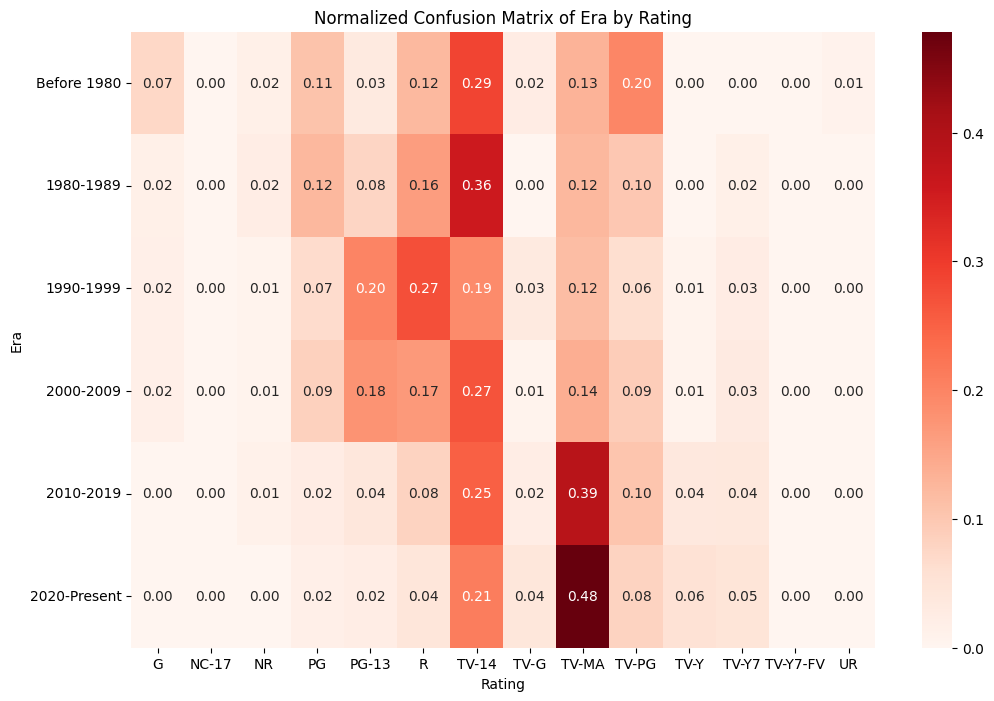

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ลบค่า NaN ใน Era และ rating
df_filtered = df_Netflix.dropna(subset=['Era', 'rating'])

# สร้างตาราง confusion matrix
confusion_matrix = pd.crosstab(df_filtered['Era'], df_filtered['rating'])

# กำหนดลำดับของ Era
era_order = ['Before 1980', '1980-1989', '1990-1999', '2000-2009', '2010-2019', '2020-Present']
confusion_matrix.index = pd.Categorical(confusion_matrix.index, categories=era_order, ordered=True)

# ตรวจสอบและเรียงลำดับ confusion matrix
confusion_matrix = confusion_matrix.sort_index()

# ปกติค่า (normalization) ของ confusion matrix โดยหารด้วยผลรวมในแต่ละแถว
confusion_matrix_normalized = confusion_matrix.div(confusion_matrix.sum(axis=1), axis=0)

# ตรวจสอบว่ามีข้อมูลใน confusion matrix หรือไม่
if not confusion_matrix_normalized.empty:
    # สร้าง heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(confusion_matrix_normalized, annot=True, fmt='.2f', cmap='Reds', cbar=True)  # เปลี่ยนพาเลตต์สีเป็น 'Reds'
    plt.title('Normalized Confusion Matrix of Era by Rating')
    plt.xlabel('Rating')
    plt.ylabel('Era')
    plt.yticks(rotation=0)  # ปรับการหมุนชื่อแกน Y
    plt.show()
else:
    print("The confusion matrix is empty. Please check your data.")

<ipython-input-87-4e4bc6ebc574>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-87-4e4bc6ebc574>:10: UserWarning:


The palette list has fewer values (2) than needed (36) and will cycle, which may produce an uninterpretable plot.



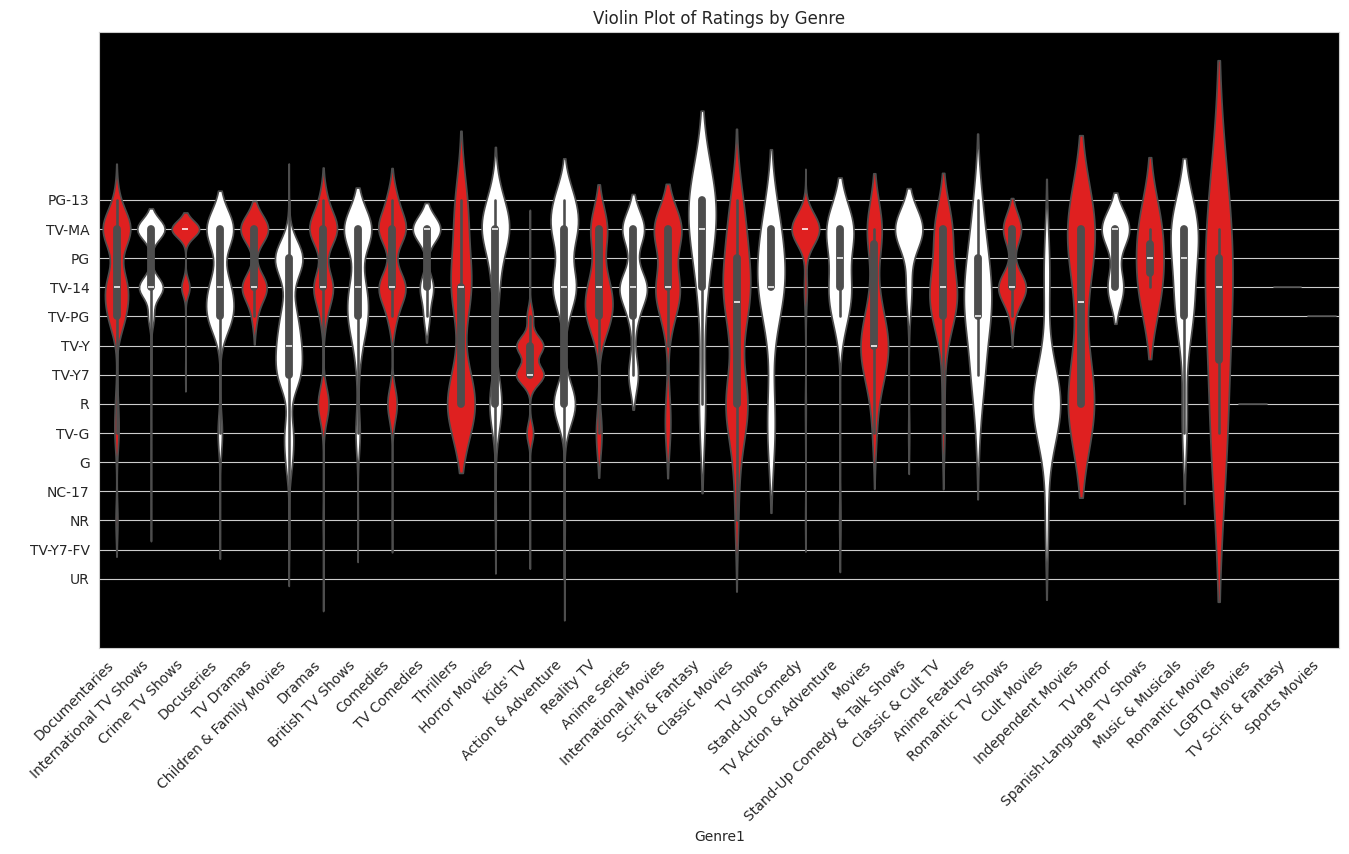

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# กำหนดรูปแบบสี
sns.set_style("whitegrid", {'axes.facecolor': 'black'})  # กำหนดพื้นหลังเป็นสีดำ

plt.figure(figsize=(16, 8))  # ปรับขนาดกราฟให้กว้างและสูงขึ้น

# สร้าง Violin Plot และกำหนดสี
sns.violinplot(x='Genre1', y='rating', data=df_Netflix, palette=["red", "white"])

plt.title('Violin Plot of Ratings by Genre')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Rating', color='white')  # เปลี่ยนสีตัวอักษรของแกน Y เป็นสีขาว

plt.show()

In [ ]:
import plotly.express as px


# Grouping the data by 'festival' and counting occurrences of each genre
df_melted = df_Netflix.melt(id_vars=['festival'], value_vars=['Genre1', 'Genre2', 'Genre3'], var_name='genre_type', value_name='genre')
df_genre_festival = df_melted[df_melted['genre'] != 'Unknown'].groupby(['festival', 'genre']).size().reset_index(name='count')


# Custom color palette with smoother transitions
custom_colors = ['#f5eeed', '#f0d4d5', '#e8b1b2', '#e29595', '#d77676', '#c95c5c', '#b64545', '#a12e2e', '#8e2323', '#780900']


# Creating the treemap using Plotly
fig = px.treemap(df_genre_festival, path=['festival', 'genre'], values='count',
                color='count', hover_data=['festival', 'genre'],
                color_continuous_scale=custom_colors,
                title='Treemap of Genres by Festival')


fig.show()